## Versuch 3: Fourieranalyse und Akustik

In diesem Praktikum wird die Fourieranalyse auf akustische Signale angewandt, um den Frequenzgang von Lautsprechern zu messen und ein Verständnis für die Fourierreihe zu entwickeln. Alle Programme und Berechnungen werden im folgenden Jupyter-Notebook dokumentiert.



### Aufgabe 1: Bestimmung der Tonhöhe eines akustischen Signals

---

1.1 Erstmal Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

1.2 Dann die file vom Ton der Harmonika einlesen:

In [2]:
df = pd.read_csv('Data/Harmonika.csv', delimiter=';')

1.3 Signal plotten: 

[-25.00499905 -24.99999905 -24.99499905 ...  24.99499969  24.99999968
  25.00499968]
[-2.982898  -5.406619  -6.524975  ... -0.7455708  0.         0.       ]


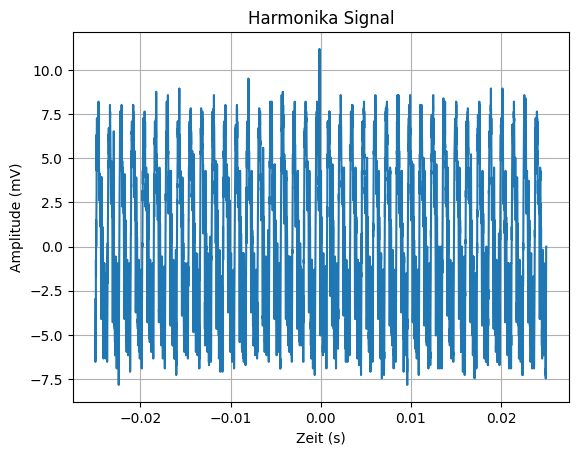

In [3]:
# Replace comma with dot in the columns
df['Zeit'] = df['Zeit'].str.replace(',', '.')
df['Kanal A'] = df['Kanal A'].str.replace(',', '.')

# Convert the columns to numeric
time_ms = pd.to_numeric(df['Zeit'].values[2:])
signal_mv = pd.to_numeric(df['Kanal A'].values[2:])

print(time_ms)
print(signal_mv)

# Convert time to seconds
time_s = time_ms / 1000

plt.plot(time_s, signal_mv)
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Harmonika Signal')
plt.grid(True)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.show()


1.3 Parameter Berechnen: <br>
    Signaldauer (in s), Abtastfrequenz (in Hz), Signallänge M (Anzahl der Abtastzeitpunkte) und Abtastintervall ∆t (in s)


In [4]:
# Calculate the signal duration
signal_duration = time_s[-1] - time_s[0]
print(f'Signaldauer: {signal_duration:.4f}s')

# Calculate the sampling frequency
sampling_frequency = len(time_s) / signal_duration
print(f'Abtastfrequenz: {sampling_frequency:.4f}Hz')

# Calculate the signal length in number of samples
signal_length = len(time_s)
print(f'Signallänge M: {signal_length}')

# Calculate the sampling interval
sampling_interval = signal_duration / signal_length
print(f'Abtastintervall ∆t: {sampling_interval:.8f}s')


Signaldauer: 0.0500s
Abtastfrequenz: 200020.0011Hz
Signallänge M: 10003
Abtastintervall ∆t: 0.00000500s


1.4 Fouriertransformation: <br>
    Fouriertransformation des Signals berechnen und plotten:
    $$ f = \frac{n}{M \cdot \Delta t} $$

    

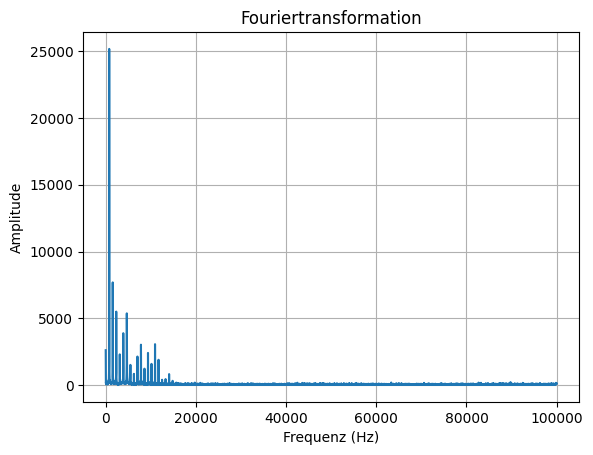

In [5]:
# Perform FFT on the signal
signal_fft = np.fft.fft(signal_mv)

# Calculate the frequency axis
frequencies = np.fft.fftfreq(signal_length, sampling_interval)

# Calculate the amplitude spectrum
amplitude_spectrum = np.abs(signal_fft)

# Plot only the positive frequencies
plt.plot(frequencies[:signal_length // 2], amplitude_spectrum[:signal_length // 2])
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('Fouriertransformation')
plt.grid(True)
plt.show()

1.5 Frequenz berechnen: <br>
    Grundfrequenz identifizieren und aus der gefundenen Wellenzahl die Frequenz berechnen 

In [6]:
# Find the index of the maximum amplitude in the positive frequencies
max_index = np.argmax(amplitude_spectrum[:signal_length // 2])

# Get the fundamental frequency in Hz
fundamental_frequency_hz = frequencies[max_index]

# Get the amplitude of the fundamental frequency
fundamental_amplitude = amplitude_spectrum[max_index]

print(f'Grundfrequenz: {fundamental_frequency_hz:.2f} Hz')
print(f'Amplitude der Grundfrequenz: {fundamental_amplitude:.2f}')


Grundfrequenz: 779.84 Hz
Amplitude der Grundfrequenz: 25182.33
